In [40]:
# import warnings filter
from warnings import simplefilter
import warnings
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')


In [56]:
import pandas as pd
import numpy as np
import ast
from itertools import combinations, product
from sklearn import manifold
import matplotlib.pyplot as plt
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import textblob

In [42]:
df = pd.read_csv("output_combined_location.csv")

In [43]:
#Get the tweets
#Get the frequency of the countries mentioned
df.head()

,id,username,text,retweets,favorites,replies,permalink,date,mentions,hashtags,Tweet_Token,Tweet_Location_Found
0,1200516560160481280,vanderfullife,Pan Pacific Airlines adds Clark – Muan route f...,0,0,0,https://twitter.com/vanderfullife/status/12005...,2019-11-29 20:47:07+00:00,NaN,#news #today #travel #vacation #cruise #holida...,"['Pan', 'Pacific', 'Airlines', 'adds', 'Clark'...",['pan']
1,1200516487389122560,sweetsteph0914,Today I was presented w/ an #eviction notice (...,0,0,0,https://twitter.com/sweetsteph0914/status/1200...,2019-11-29 20:46:49+00:00,@Twitter,#eviction #holidays,"['Today', 'I', 'was', 'presented', 'w', '/', '...","['at', 'can', 'me', 'my', 'to']"
2,1200516453612568576,PhilMorseRE,Earning extra money during the #holidays can m...,0,0,0,https://twitter.com/PhilMorseRE/status/1200516...,2019-11-29 20:46:41+00:00,NaN,#holidays #creditcards,"['Earning', 'extra', 'money', 'during', 'the',...","['can', 'it', 'to']"
3,1200516306967154688,HollyNorth,"Oh the weather outside is frightful, and our s...",0,0,0,https://twitter.com/HollyNorth/status/12005163...,2019-11-29 20:46:06+00:00,NaN,#Holidays #HollyNorth #HollyNorthProductionSup...,"['Oh', 'the', 'weather', 'outside', 'is', 'fri...","['and', 'is', 'it', 'so']"
4,1200516102205239296,LissaandTiniRay,Hanging with some of my favs @CranbrookLiquo1 ...,0,0,0,https://twitter.com/LissaandTiniRay/status/120...,2019-11-29 20:45:17+00:00,@CranbrookLiquo1,#g4tequila #liquorstores #tastings #lovethiscr...,"['Hanging', 'with', 'some', 'of', 'my', 'favs'...","['and', 'my']"


In [44]:
no_null_values = df["Tweet_Location_Found"].dropna()

In [45]:
destinations

,id,username,text,retweets,favorites,replies,permalink,date,mentions,hashtags,Tweet_Token,Tweet_Location_Found,Tweet_Token_Stop_Words
0,1200516560160481280,vanderfullife,Pan Pacific Airlines adds Clark – Muan route f...,0,0,0,https://twitter.com/vanderfullife/status/12005...,2019-11-29 20:47:07+00:00,NaN,#news #today #travel #vacation #cruise #holida...,"['Pan', 'Pacific', 'Airlines', 'adds', 'Cl...",['pan'],"['Pan', 'Pacific', 'Airlines', 'adds', 'Cl..."
1,1200516487389122560,sweetsteph0914,Today I was presented w/ an #eviction notice (...,0,0,0,https://twitter.com/sweetsteph0914/status/1200...,2019-11-29 20:46:49+00:00,@Twitter,#eviction #holidays,"['Today', 'I', 'was', 'presented', 'w', '...","['at', 'can', 'me', 'my', 'to']","['Today', 'I', 'was', 'presented', 'w', '..."
2,1200516453612568576,PhilMorseRE,Earning extra money during the #holidays can m...,0,0,0,https://twitter.com/PhilMorseRE/status/1200516...,2019-11-29 20:46:41+00:00,NaN,#holidays #creditcards,"['Earning', 'extra', 'money', 'during', 't...","['can', 'it', 'to']","['Earning', 'extra', 'money', 'during', 't..."
3,1200516306967154688,HollyNorth,"Oh the weather outside is frightful, and our s...",0,0,0,https://twitter.com/HollyNorth/status/12005163...,2019-11-29 20:46:06+00:00,NaN,#Holidays #HollyNorth #HollyNorthProductionSup...,"['Oh', 'the', 'weather', 'outside', 'is', ...","['and', 'is', 'it', 'so']","['Oh', 'the', 'weather', 'outside', 'is', ..."
4,1200516102205239296,LissaandTiniRay,Hanging with some of my favs @CranbrookLiquo1 ...,0,0,0,https://twitter.com/LissaandTiniRay/status/120...,2019-11-29 20:45:17+00:00,@CranbrookLiquo1,#g4tequila #liquorstores #tastings #lovethiscr...,"['Hanging', 'with', 'some', 'of', 'my', '...","['and', 'my']","['Hanging', 'with', 'some', 'of', 'my', '..."
5,1200516085835014150,TheDarianH,New single out now! Stream for free on all str...,0,0,0,https://twitter.com/TheDarianH/status/12005160...,2019-11-29 20:45:14+00:00,NaN,#christmas #friday #holidays #newmusic #new #m...,"['New', 'single', 'out', 'now', '!', 'Str...",['in'],"['New', 'single', 'out', 'now', '!', 'Str..."
6,1200516039748046849,GallagherWayChi,There's nothing quite like DIY-ing during the ...,0,0,0,https://twitter.com/GallagherWayChi/status/120...,2019-11-29 20:45:03+00:00,NaN,#holidays #WinterlandatGallagherWay,"[""There's"", 'nothing', 'quite', 'like', 'D...",['at'],"[""There's"", 'nothing', 'quite', 'like', 'D..."
7,1200516028201082880,touchstonewdc,The #holidays are here! Rent our #gallery #spa...,0,0,0,https://twitter.com/touchstonewdc/status/12005...,2019-11-29 20:45:00+00:00,NaN,#holidays #gallery #space #party #event #dc #r...,"['The', '#holidays', 'are', 'here', '!', ...",['are'],"['The', '#holidays', 'are', 'here', '!', ..."
8,1200515578215174145,neilwalkerwrote,This #action-packed #crime #thriller is set ov...,0,0,0,https://twitter.com/neilwalkerwrote/status/120...,2019-11-29 20:43:13+00:00,NaN,#action #crime #thriller #Christmas #newyear #...,"['This', '#action-packed', '#crime', '#thri...","['by', 'is']","['This', '#action-packed', '#crime', '#thri..."
10,1200515516986736641,g2g_apparel,@FounDAYtionPrints will be showcasing these ba...,0,0,0,https://twitter.com/g2g_apparel/status/1200515...,2019-11-29 20:42:58+00:00,@FounDAYtionPrints,#PHILLY #homedecor #shopping #soakingtub #bath...,"['@FounDAYtionPrints', 'will', 'be', 'showc...","['at', 'be', 'in']","['@FounDAYtionPrints', 'will', 'be', 'showc..."


In [46]:
destinations = df.iloc[no_null_values.index]

In [47]:
def convert_to_array(val):
    str1 = val.replace(']','').replace('[','')
    l = str1.split(",")
    return l

In [48]:
#let's remove stop words from the tweet token
stop_words = set(stopwords.words('english')) 

In [57]:
def splitter(data):
    words = re.sub("([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", data.lower()).split()
    return [textblob.Word(word).lemmatize() for word in words]

In [49]:
def remove_stop_words(word_tokens):   
    filtered_sentence = [] 
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w)
    return filtered_sentence

In [50]:
destinations["Tweet_Location_Found"] = destinations["Tweet_Location_Found"].apply(lambda x: convert_to_array(x))

In [51]:
destinations["Tweet_Token"] = destinations["Tweet_Token"].apply(lambda x: convert_to_array(x))

In [52]:
destinations["Tweet_Token_Stop_Words"] = destinations["Tweet_Token"].apply(lambda x: remove_stop_words(x))

In [ ]:
destinations["new tweets"] = destinations["Tweet_Token"].apply(lambda x: splitter(x))

In [53]:
destinations

,id,username,text,retweets,favorites,replies,permalink,date,mentions,hashtags,Tweet_Token,Tweet_Location_Found,Tweet_Token_Stop_Words
0,1200516560160481280,vanderfullife,Pan Pacific Airlines adds Clark – Muan route f...,0,0,0,https://twitter.com/vanderfullife/status/12005...,2019-11-29 20:47:07+00:00,NaN,#news #today #travel #vacation #cruise #holida...,"['Pan', 'Pacific', 'Airlines', 'adds', 'Cl...",['pan'],"['Pan', 'Pacific', 'Airlines', 'adds', 'Cl..."
1,1200516487389122560,sweetsteph0914,Today I was presented w/ an #eviction notice (...,0,0,0,https://twitter.com/sweetsteph0914/status/1200...,2019-11-29 20:46:49+00:00,@Twitter,#eviction #holidays,"['Today', 'I', 'was', 'presented', 'w', '...","['at', 'can', 'me', 'my', 'to']","['Today', 'I', 'was', 'presented', 'w', '..."
2,1200516453612568576,PhilMorseRE,Earning extra money during the #holidays can m...,0,0,0,https://twitter.com/PhilMorseRE/status/1200516...,2019-11-29 20:46:41+00:00,NaN,#holidays #creditcards,"['Earning', 'extra', 'money', 'during', 't...","['can', 'it', 'to']","['Earning', 'extra', 'money', 'during', 't..."
3,1200516306967154688,HollyNorth,"Oh the weather outside is frightful, and our s...",0,0,0,https://twitter.com/HollyNorth/status/12005163...,2019-11-29 20:46:06+00:00,NaN,#Holidays #HollyNorth #HollyNorthProductionSup...,"['Oh', 'the', 'weather', 'outside', 'is', ...","['and', 'is', 'it', 'so']","['Oh', 'the', 'weather', 'outside', 'is', ..."
4,1200516102205239296,LissaandTiniRay,Hanging with some of my favs @CranbrookLiquo1 ...,0,0,0,https://twitter.com/LissaandTiniRay/status/120...,2019-11-29 20:45:17+00:00,@CranbrookLiquo1,#g4tequila #liquorstores #tastings #lovethiscr...,"['Hanging', 'with', 'some', 'of', 'my', '...","['and', 'my']","['Hanging', 'with', 'some', 'of', 'my', '..."
5,1200516085835014150,TheDarianH,New single out now! Stream for free on all str...,0,0,0,https://twitter.com/TheDarianH/status/12005160...,2019-11-29 20:45:14+00:00,NaN,#christmas #friday #holidays #newmusic #new #m...,"['New', 'single', 'out', 'now', '!', 'Str...",['in'],"['New', 'single', 'out', 'now', '!', 'Str..."
6,1200516039748046849,GallagherWayChi,There's nothing quite like DIY-ing during the ...,0,0,0,https://twitter.com/GallagherWayChi/status/120...,2019-11-29 20:45:03+00:00,NaN,#holidays #WinterlandatGallagherWay,"[""There's"", 'nothing', 'quite', 'like', 'D...",['at'],"[""There's"", 'nothing', 'quite', 'like', 'D..."
7,1200516028201082880,touchstonewdc,The #holidays are here! Rent our #gallery #spa...,0,0,0,https://twitter.com/touchstonewdc/status/12005...,2019-11-29 20:45:00+00:00,NaN,#holidays #gallery #space #party #event #dc #r...,"['The', '#holidays', 'are', 'here', '!', ...",['are'],"['The', '#holidays', 'are', 'here', '!', ..."
8,1200515578215174145,neilwalkerwrote,This #action-packed #crime #thriller is set ov...,0,0,0,https://twitter.com/neilwalkerwrote/status/120...,2019-11-29 20:43:13+00:00,NaN,#action #crime #thriller #Christmas #newyear #...,"['This', '#action-packed', '#crime', '#thri...","['by', 'is']","['This', '#action-packed', '#crime', '#thri..."
10,1200515516986736641,g2g_apparel,@FounDAYtionPrints will be showcasing these ba...,0,0,0,https://twitter.com/g2g_apparel/status/1200515...,2019-11-29 20:42:58+00:00,@FounDAYtionPrints,#PHILLY #homedecor #shopping #soakingtub #bath...,"['@FounDAYtionPrints', 'will', 'be', 'showc...","['at', 'be', 'in']","['@FounDAYtionPrints', 'will', 'be', 'showc..."


In [54]:
def word_freq(word_list):
    word_map = {}
    for a in word_list:
        for word in a:
            word = word.strip()
            if word in word_map:
                word_map[word] += 1
            else:
                word_map.update({word : 1})
    return sorted(word_map.items(), key=lambda kv: kv[1],reverse=True)

In [55]:
word_freq(destinations["Tweet_Token_Stop_Words"])

[("'", 15706),
 ("'.'", 8164),
 ("'the'", 7108),
 ("'!'", 6441),
 ("'to'", 6195),
 ("'…'", 6052),
 ("'a'", 4876),
 ("'and'", 4806),
 ("'for'", 4386),
 ("'in'", 3793),
 ("'of'", 3753),
 ("'#vacation'", 3727),
 ("':'", 3697),
 ("'#holidays'", 3245),
 ("'#travel'", 2986),
 ("'#destination'", 2894),
 ("'you'", 2783),
 ("'-'", 2762),
 ("'your'", 2525),
 ("'is'", 2497),
 ("'#getaway'", 2288),
 ("'with'", 1989),
 ("'at'", 1827),
 ("'on'", 1822),
 ("'#Travel'", 1727),
 ("'?'", 1697),
 ("'#Holidays'", 1570),
 ("'#Vacation'", 1435),
 ("'The'", 1398),
 ("'’'", 1319),
 ("'this'", 1227),
 ("'#holiday'", 1182),
 ("'are'", 1173),
 ("'I'", 1135),
 ("'#Getaway'", 1130),
 ("'&'", 1104),
 ("'from'", 1095),
 ("'our'", 1068),
 ("'/'", 1046),
 ("'all'", 890),
 ("'it'", 879),
 ("'#Hotel'", 875),
 ("'#Destination'", 871),
 ("'be'", 833),
 ("'us'", 832),
 ("'#Weekend'", 807),
 ("'Thanksgiving'", 795),
 ("'...'", 790),
 ("'£'", 783),
 ("'#Flights'", 740),
 ("'English'", 740),
 ("'#news'", 732),
 ("'Tour'", 732)

In [11]:
top_10_destinations = ["scotland","la","florida","york","turkey","spain","bali","italy","california","india"]

In [12]:
# Calculation of lift scores. Code Gotten from project 1
def do_lift(x, y=None):
    l1, l2 = sorted(x), sorted(y or [])
    bools = pd.DataFrame()
    for e in l1 + l2:
        bools[e] = destinations['Tweet_Token'].map(lambda words: e in words)

    def do(df, a, b):
        count_a_int_b = np.logical_and(df[a], df[b]).values.sum()
        count_a_mult_count_b = df[a].values.sum() * df[b].values.sum()
        return len(df.index) * count_a_int_b / count_a_mult_count_b

    result_df = pd.DataFrame(index=l1, columns=(l2 or l1))
    for a, b in (combinations(l1, 2) if y==None else product(l1, l2)):
        val = do(bools, a, b)
        result_df.at[a, b] = val
        if y==None:
            result_df.at[b, a] = val

    return result_df

In [13]:
top_destinations = do_lift(top_10_destinations)
topDestinationsList = list(top_destinations.columns)

In [14]:
#Lets take care of the 0 scores by padding the lift values by 0.5
floatdf = top_destinations.astype(float)
floatdf = floatdf.add(0.5)
np.fill_diagonal(floatdf.values, 0)
floatdf

,bali,california,florida,india,italy,la,scotland,spain,turkey,york
bali,0.000000,0.500000,0.500000,10.915895,0.500000,1.775206,0.500000,0.500000,0.500000,0.500000
california,0.500000,0.000000,0.500000,3.540315,0.500000,1.640681,0.500000,0.500000,0.500000,0.500000
florida,0.500000,0.500000,0.000000,1.823431,4.373458,1.702130,0.500000,0.500000,1.521298,0.500000
india,10.915895,3.540315,1.823431,0.000000,0.500000,1.647685,0.500000,0.500000,0.500000,0.500000
italy,0.500000,0.500000,4.373458,0.500000,0.000000,1.800289,1.303034,0.500000,0.500000,2.507585
la,1.775206,1.640681,1.702130,1.647685,1.800289,0.000000,2.721326,1.725559,1.207110,0.960519
scotland,0.500000,0.500000,0.500000,0.500000,1.303034,2.721326,0.000000,0.500000,0.500000,0.500000
spain,0.500000,0.500000,0.500000,0.500000,0.500000,1.725559,0.500000,0.000000,0.500000,0.500000
turkey,0.500000,0.500000,1.521298,0.500000,0.500000,1.207110,0.500000,0.500000,0.000000,1.029331
york,0.500000,0.500000,0.500000,0.500000,2.507585,0.960519,0.500000,0.500000,1.029331,0.000000


In [15]:
dissimilarity_matrix = (1/floatdf).astype(float)
np.fill_diagonal(dissimilarity_matrix.values, 0)
dissimilarity_matrix

,bali,california,florida,india,italy,la,scotland,spain,turkey,york
bali,0.000000,2.000000,2.000000,0.091610,2.000000,0.563315,2.000000,2.000000,2.000000,2.000000
california,2.000000,0.000000,2.000000,0.282461,2.000000,0.609503,2.000000,2.000000,2.000000,2.000000
florida,2.000000,2.000000,0.000000,0.548417,0.228652,0.587499,2.000000,2.000000,0.657334,2.000000
india,0.091610,0.282461,0.548417,0.000000,2.000000,0.606912,2.000000,2.000000,2.000000,2.000000
italy,2.000000,2.000000,0.228652,2.000000,0.000000,0.555467,0.767440,2.000000,2.000000,0.398790
la,0.563315,0.609503,0.587499,0.606912,0.555467,0.000000,0.367468,0.579522,0.828425,1.041104
scotland,2.000000,2.000000,2.000000,2.000000,0.767440,0.367468,0.000000,2.000000,2.000000,2.000000
spain,2.000000,2.000000,2.000000,2.000000,2.000000,0.579522,2.000000,0.000000,2.000000,2.000000
turkey,2.000000,2.000000,0.657334,2.000000,2.000000,0.828425,2.000000,2.000000,0.000000,0.971505
york,2.000000,2.000000,2.000000,2.000000,0.398790,1.041104,2.000000,2.000000,0.971505,0.000000


In [16]:
# Plotting MDS plot
seed = np.random.RandomState(seed=3)
mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, 
      random_state=seed, dissimilarity="precomputed", n_jobs=1)
results = mds.fit(dissimilarity_matrix)
coords = results.embedding_

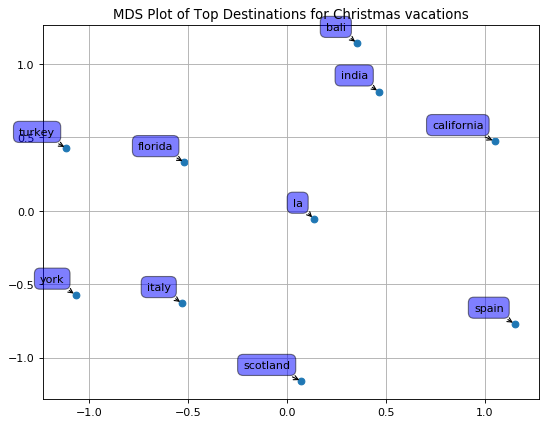

In [17]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(bottom = 0.1)
plt.scatter(coords[:, 0], coords[:, 1], marker = 'o')

for label, x, y in zip(topDestinationsList, coords[:, 0], coords[:, 1]):
    plt.annotate(
        label,
        xy = (x, y), xytext = (-10, 10),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'blue', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
plt.title('MDS Plot of Top Destinations for Christmas vacations')
plt.grid()
plt.show()